In [2]:
!pip install opencv-python

In [3]:
!pip install ipython

# Modul 1 : Sekilas Tentang Gambar

### Import Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

### Menampilkan Gambar Secara Langsung

Kita akan menampilkan gambar 'checkerboard_image.png'. Kita akan menggunakan image function pada ipython untuk memuat dan menampilkan gambar

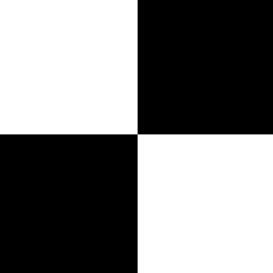

In [10]:
#Menampilkan gambar
Image(filename='checkerboard.png')

### Membaca Gambar Menggunakan OpenCV

In [9]:
#Membaca gambar dengan mode gray scale (gambar asli menjadi berwarna abu2)
image = cv2.imread('checkerboard.png', 0) #parameter 0 untuk mode gray scale, atau menggunakan fungsi ')cv2.IMREAD_GRAYSCALE('nama file')
                                          #1 untuk gambar berwarna, atau menggunakan fungsi cv2.IMREAD_COLOR('nama file
                                          #-1 untuk gambar yang mengandung alpha channel, atau menggunakan fungsi cv2.IMREAD_UNCHANGED('nama file')

# Memprint data gambar (pixel value), dalam bentuk numpy array 2 dimensi
# Setiap pixel bernilai 8 bit [0, 255]
print(image)

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


### Menampilkan Atribut Gambar

In [11]:
# Memprint ukuran gambar
print('image size is ', image.shape) #shape adalah fungsi yang terdapat pada numpy

# Memprint tipe data (data type) dari gambar
print('Data type of image is ', image.dtype) #dtype adalah fungsi yang terdapat pada numpy

image size is  (273, 273)
Data type of image is  uint8


### Menampilkan Gambar Menggunakan Matplotlib

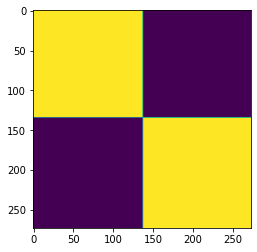

In [12]:
plt.imshow(image)

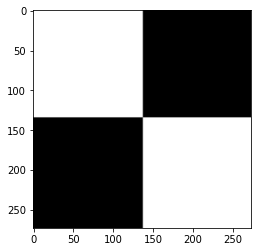

In [13]:
# Gambar di atas menjadi tidak gray scale karena menggunakan matplotlib

# Menset color map ke gray scale for rendering yang lebih baik
plt.imshow(image, cmap='gray')

### Bekerja dengan Gambar Berwarna

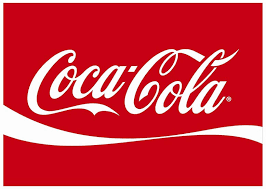

In [14]:
# Membaca dan Menampilkan gambar cocacola_logo.png
Image('cocacola_logo.png') #ini menggunakan fungsi yang berada dalam ipython

### Membaca dan Menampilkan Gambar Berwarna

In [15]:
# Membaca gambar
coca_img = cv2.imread('cocacola_logo.png', 1) #memasukkan parameter 1 untuk membaca gambar berwarna

# Memprint ukuran gambar (p x p)
print('Image size is ', coca_img.shape)

# Memprint tipe data dari gambar
print('Data type of image is ', coca_img.dtype)

Image size is  (189, 266, 3)
Data type of image is  uint8


gambar di atas berformat BGR (berwarna), dengan ukuran 189 x 266, dan channelnya adalah ada 3 yaitu Red, Blue, Green

### Menampilkan Gambar Berwarna dengan Matplotlib

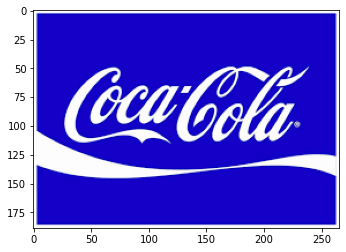

In [16]:
plt.imshow(coca_img)

<b>Gambar yang ditampilkan di atas berbeda dengan gambar aslinya.</b> Ini karena matplotlib mengharapkan gambar yang berformat RGB padahal openCV menyimpan gambar dengan format BGR. Untuk memperbaiki tampilannya, kita harus membalik channel pada gambar


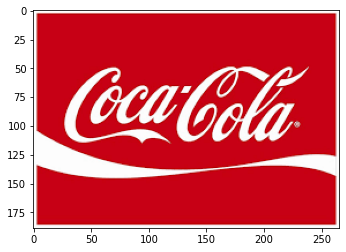

In [17]:
# Membalik channel pada gambar
coca_img_channels_reversed = coca_img[:, :, ::-1]
plt.imshow(coca_img_channels_reversed)

### Splitting(Membelah) dan Merging(Menyatukan) Channel Warna

cv2.split() untuk membagi array multi-channel menjadi beberapa array satu channel.

cv2.merge() untuk menggabungkan beberapa array agar menjadi sebuah array multi-channel. Semua input matriks harus memiliki ukuran yang sama.

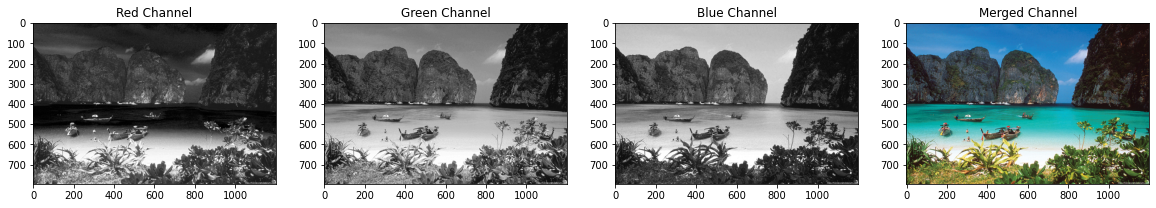

In [20]:
# Membelah gambar menjadi komponen B, G, dan R
img_bgr = cv2.imread('raja-ampat.jpg', cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_bgr)

# Menampilkan channel2nya
plt.figure(figsize=[20,50]) #menyetel ukuran plot 
plt.subplot(141);plt.imshow(r, cmap='gray');plt.title('Red Channel');
plt.subplot(142);plt.imshow(g, cmap='gray');plt.title('Green Channel');
plt.subplot(143);plt.imshow(b, cmap='gray');plt.title('Blue Channel');

# Menggabungkan masing masing channel ke bentuk gambar RGB
imgMerged = cv2.merge((b,g,r))

# Menampilkan gambar yang sudah dimerge/digabung
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title('Merged Channel');

### Mengkonversi ke Berbagai Macam Color Space

cv2.Color() Mengkonversi gambar dari suatu color space ke color space lainnya

### Merubah dari BGR ke RGB

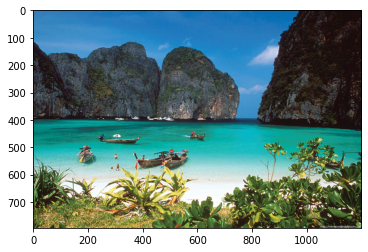

In [21]:
# OpenCV menyimpan channel warna dengan urutan yang berbeda dari kebanyakan aplikasi lain (BGR vs RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Merubah ke HSV (Hue Saturation Value) Color Space

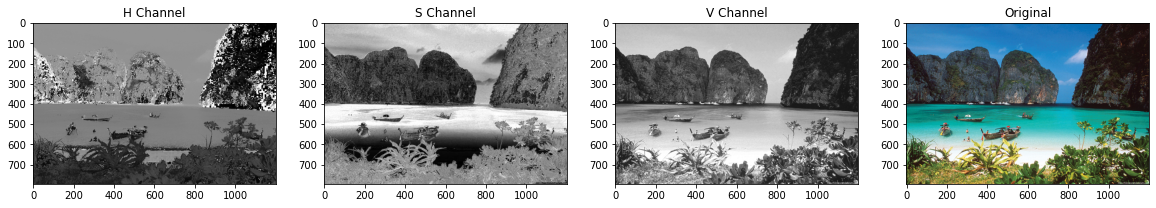

In [22]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
# Membelah gambar menjadi komponen HSV
h,s,v = cv2.split(img_hsv)

# Menampilkan channel2nya
plt.figure(figsize=[20,50]) #menyetel ukuran plot 
plt.subplot(141);plt.imshow(h, cmap='gray');plt.title('H Channel');
plt.subplot(142);plt.imshow(s, cmap='gray');plt.title('S Channel');
plt.subplot(143);plt.imshow(v, cmap='gray');plt.title('V Channel');
plt.subplot(144);plt.imshow(img_rgb, cmap='gray');plt.title('Original');

### Memodifikasi Salah Satu Channel (gambar hsv di atas)

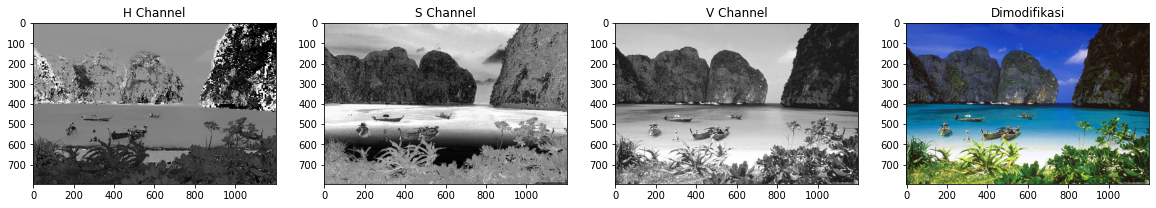

In [23]:
h_new = h+10 #memodifikasi hue (warna)
img_merged = cv2.merge((h_new, s,v))
img_rgb = cv2.cvtColor(img_merged, cv2.COLOR_HSV2RGB)

# Menampilkan channel2nya
plt.figure(figsize=[20,50]) #menyetel ukuran plot 
plt.subplot(141);plt.imshow(h, cmap='gray');plt.title('H Channel');
plt.subplot(142);plt.imshow(s, cmap='gray');plt.title('S Channel');
plt.subplot(143);plt.imshow(v, cmap='gray');plt.title('V Channel');
plt.subplot(144);plt.imshow(img_rgb, cmap='gray');plt.title('Dimodifikasi');

### Menyimpan Gambar

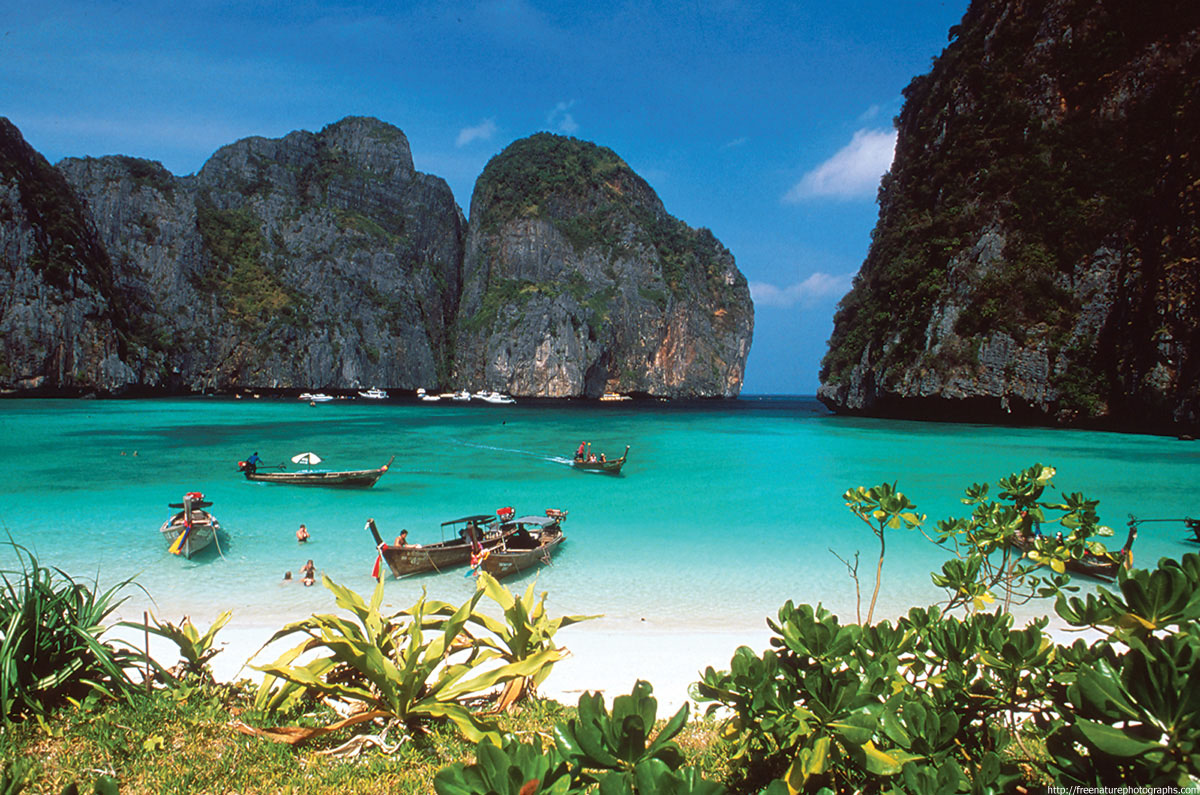

In [24]:
# Menyimpan Gambar
cv2.imwrite('raja-ampat-saved.png', img_bgr)

Image(filename='raja-ampat-saved.png')

# Modul 2: Manipulasi Gambar Dasar

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


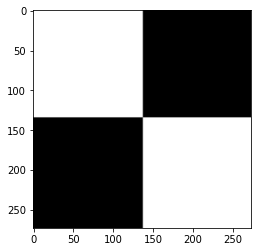

In [26]:
# Membaca gambar dengan mode gray scale
cb_img = cv2.imread('checkerboard.png', 0)

# Mengeset color map ke gray scale untuk rendering yang lebih baik
plt.imshow(cb_img, cmap='gray')
print(cb_img)

### Mengakses Pixel pada Gambar

Untuk mengakses sebuah pixel di dalam numpy array, kita harus menggunakan notasi matriks seperti m[baris, kolom]

In [27]:
# Memprint pixel pertama dari kotak putih pertama
print(cb_img[0,0])
# Memprint pixel pertama dari kotak hitam di sebelah kotak hitam pertama
print(cb_img[0,138])

255
0


### Memodifikasi Pixel pada Gambar

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


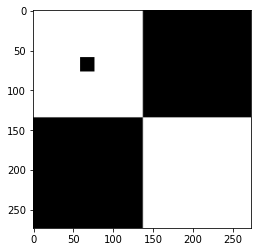

In [28]:
cb_img_copy = cb_img.copy()
cb_img_copy[59:77, 59:77] = 0 # baris dan kolom 59 sampai baris dan kolom 77 diganti nilai pixelnya menjadi 0

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

### Mengcrop Gambar

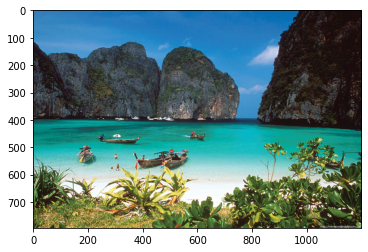

In [30]:
img_bgr = cv2.imread('raja-ampat.jpg', cv2.IMREAD_COLOR)
img_rgb = img_bgr[:,:,::-1]

plt.imshow(img_rgb)

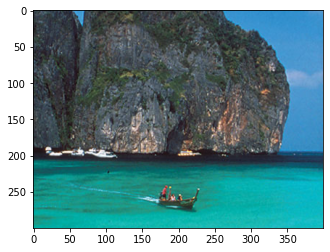

In [31]:
# Mengcrop Bagian Tengah Gambar
cropped_region = img_rgb[200:500, 400:800]
plt.imshow(cropped_region)

### Merubah Ukuran Gambar

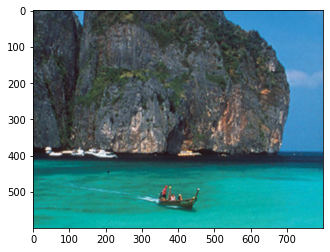

In [32]:
# Metode 1 : Menentukan Faktor Skala Menggunakan fx dan fy

resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
#fx : faktor skala di sepanjang sumbu x, jika nilainya 0 akan dihitung sebagai (double)dsize.width/src.cols
#fy : faktor skala di sepanjang sumbu y, jika nilainya 0 akan dihitung sebagai (double)dsize.height/src.rows

plt.imshow(resized_cropped_region_2x)

jika dilihat dari indikator grafiknya ukuran gambar menjadi 2 kali lipat dari 273 x 273 menjadi 546 x 546

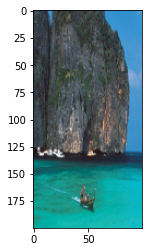

In [33]:
# Metode 2 : Menentukan Ukuran Pasti dari Gambar Output

desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Merubah ukuran background gambar 
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

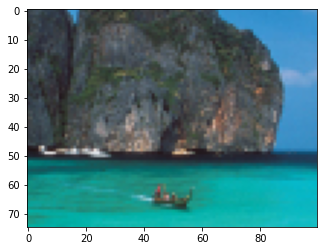

In [34]:
# Metode 3 : Merubah Ukuran Gambar Sambil Menjaga Aspect Ratio

desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Merubah ukuran background gambar 
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Menampilkan Gambar yang Sudah Dicrop

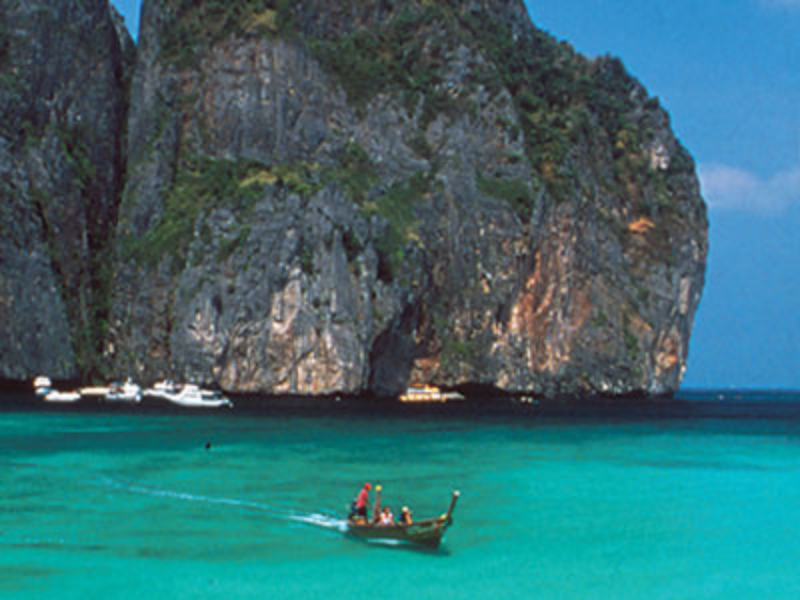

In [35]:
# Membalik urutan channel
resized_cropped_region_2x = resized_cropped_region_2x[:,:,::-1]

# Menyimpan Gambar ke Memory
cv2.imwrite('resized_cropped_region_2x.png', resized_cropped_region_2x)

# Menampilkan Gambar yang Sudah Dicrop dan Dirubah Ukurannya
Image(filename='resized_cropped_region_2x.png')

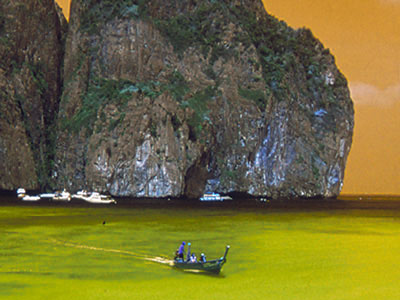

In [37]:
# Membalik urutan channel
cropped_region = cropped_region[:,:,::-1]

# Menyimpan Gambar ke Memory
cv2.imwrite('cropped_region.png', cropped_region)

# Menampilkan Gambar yang Sudah Dicrop dan Dirubah Ukurannya
Image(filename='cropped_region.png')

### Membalik Gambar

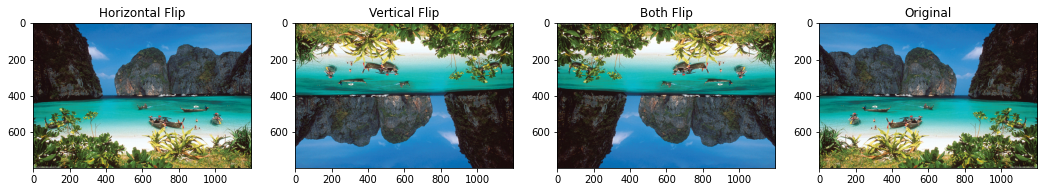

In [39]:
img_flipped_horz = cv2.flip(img_rgb, 1)
img_flipped_vert = cv2.flip(img_rgb, 0)
img_flipped_both = cv2.flip(img_rgb, -1)

plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_flipped_horz);plt.title('Horizontal Flip');
plt.subplot(142);plt.imshow(img_flipped_vert);plt.title('Vertical Flip');
plt.subplot(143);plt.imshow(img_flipped_both);plt.title('Both Flip');
plt.subplot(144);plt.imshow(img_rgb);plt.title('Original');

# Modul 3 : Menggambar Pola dan Menambah Teks pada Gambar

Kita akan belajar bagaimana membuat pemerjelas gambar dengan :
- Menggambar Garis
- Menggambar Lingkaran
- Menggambar Persegi Panjang
- Menambah Teks

In [41]:
!pip install Pillow

In [42]:
# Mengimpot Library

#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
#import Ipython.display import Image

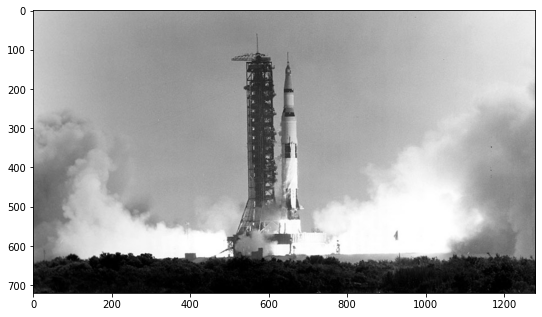

In [43]:
# Membaca Gambar
img = cv2.imread('apollo_11_launch.jpg', 1)

# Menampilkan Gambar Ori nya
plt.imshow(img[:,:,::-1])

### Menggambar Garis

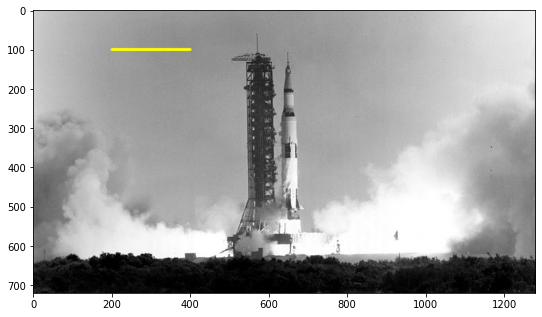

In [44]:
imgLine = img.copy()

# Garis dimulai dari (x=200, y=100) dan berakhir pada (x=400, y=100)
# Warna garisnya adalah Kuning (0, 255, 255)
# Ketebalan garisnya adalah 5 pixel
# Linetype nya adalah cv2.LINE_AA

cv2.line(imgLine, (200, 100), (400, 100), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA)

# Menampilkan Gambar
plt.imshow(imgLine[:,:,::-1])

### Menggambar Lingkaran

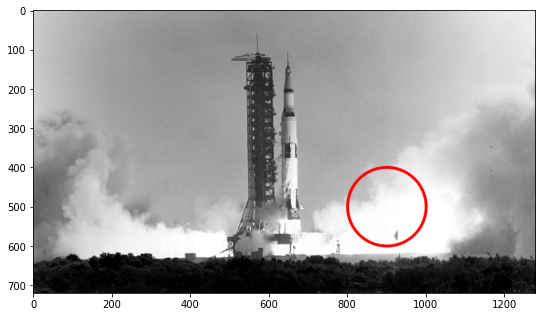

In [48]:
# Menggambar Lingkaran
imgCircle = img.copy()

cv2.circle(imgCircle, (900, 500), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA) 
# titik pusatnya di (x=900, y=500) dan radius(r) lingkaran 100 dan warnanya kuning (0, 0, 255)

# Menampilkan Gambar
plt.imshow(imgCircle[:,:,::-1])

### Menggambar Persegi Panjang

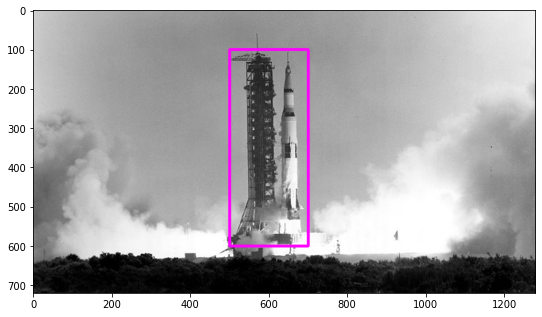

In [50]:
# Menggambar Persegi Panjang
img_Rect = img.copy()

cv2.rectangle(img_Rect, (500, 100), (700, 600), (255, 0, 255), thickness=5, lineType=cv2.LINE_AA)
# Persegi panjang dimulai dari titik (x=500,y=100) sampai titik (x=700,y=600)

# Menampilkan Gambar
plt.imshow(img_Rect[:,:,::-1])

### Menambah Teks

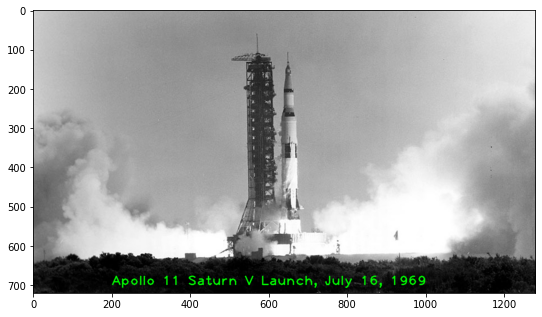

In [53]:
img_text = img.copy()
text = 'Apollo 11 Saturn V Launch, July 16, 1969'
fontScale = 2.3 # ukuran tulisan
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2
bottomLeft = (200, 700) # ini adalah titik kiri bawah pada awal teks, sehinnga kita bisa mengatur posisi teks

cv2.putText(img_text, text, bottomLeft, fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA)

# Menampilkan Gambar
plt.imshow(img_text[:,:,::-1])

# Modul 3 : Peningkatan Gambar